# Geospatial data analysis (geopandas)

## Introduction

### Important info and installing `geopandas`

_PLEASE NOTE!! This chapter is a bit diffrent than earlier ones. Here, I will introduce you to the library geopandas and show you its strengths and, hopefully, inspire you. I will need to visualize the data to do so. This means that there will be code used to plot data that hasn't been discussed in earlier chapters. So, while working with this chapter, don't get hung up on some specific code snippet that you don't understand – try to focus on the geopandas code. (You can, of course, google the code you don't understand to try to understand what does what. But know that I won't explain visualisations in detail in this chapter)_

**The `geopandas` library isn't included in the Anaconda library package, which means that you will need to install it before moving forward.** If you are using the Anaconda Cloud service, without paying for additional CPU usage, you will run into problems. Just by trying to install the geopandas library on a free account, I used more than half the CPU credits allowed for the day. Even worse, the installation failed. So I highly recommend you installing Anaconda locally on your computer, and then installing the libraries `geopandas` (for geospatial data analysis) and `contextily` (for plotting maps together with your geodata) on your computer. 

Uncomment these code cells by removing the `#` character and run the code:

In [ ]:
#!conda install geopandas

In [ ]:
#!conda install contextily

When you've installed above two libraries (you only need to run the code once), you need to restart the kernel of this notebook. You do so by selecting `Kernel > Restart Kernel...` in the notebook's dropdown menu above.

----

### Introduction

In this chapter, we will do a quick introduction to the library `geopandas`. It extends the `pandas` library to also handle geographical and spatial operations. This chapter aims to give you an insight and inspiration into what is possible while working with geospatial data analysis. 

Going forward, you might ask yourself "what the hell is this? I thought I was doing a course in python programming, and now I'm looking at pictures of the earth with degrees and stuff." And such a question is certainly relatable. But hear me out. If you want to learn how to extract information from data using pandas, geospatial data analysis opens up a whole load of possibilities. 

For example, government agencies usually have teams with engineers that work with geospatial data. They answer questions such as "where is the nearest school to this planned road?" or "How many inhabitants below the age of 18 live in this given area? Will we need to build a new school?" etc etc. This means that there are often geospatial data open to the public. In this course you will get the chance to explore such data. 

But first, we need to cover some basics.

## What is geospatial data?

Geospatial data describes some form of geographical or spatial componant. Think of it as features on a map: points on a map with coordinates (latitude and longitude), a given area on a map (often called a "polygon"), or a line on a map. It can also be detailed pictures with geographical data (think satellite imagery), or 3D data, depicting models of 3D objects in a given space.

But first, let's get into the basic geographical componants.

### Geographical data points (features)

There are many types of geographical data. Here, we will focus on what's called **vector data**. These are geographical features such as points, lines (or polylines) and polygons (or multipolygons). They all build upon a collection of coordinates.

<img src="../course_material/geo/lat_long.png" width="600"/>

In above image you can see the two types of coordinates. They are latitude that runs 90 degrees either north or south from the equater – the "hight" of the globe if you will. Or they are longitude, that run 180 degrees from east to west with Greenwich in England as the starting point – the "width" of the globe (if you wanna know why Greenwich is the starting point, [you can read  more about it here](https://en.wikipedia.org/wiki/British_Empire)). 

Coordinates are always a pair of numbers that points to the "height" and the "length" in relation to a given point (the most usual starting point being the equater and Greenwich, but it can also be relational). The geographical data points we will work with here all consists of collections of coordinate data.

#### Points

<img src="../course_material/geo/points.png" width="400"/>

_A bunch of points around the Old Town in Stockholm_

The most basic geospatial data is a point. This is just a simple pair of coordinates – one for latitude and one for longitude. A pair of coordinates is called _a datum_. Here's the datum for the Swedish parliament, the Riksdag: `59.327582, 18.068051`. You can copy these coordinates and paste them into the search bar in [google maps](https://www.google.com/maps) and it will show you where the Riksdag is located in Stockholm. 

_(As an aside, you can also right click wherever you want in google maps, and the first choice in the dropdown menu is the coordinates of where you clicked)_

Like I discussed above, these datums – these pairs of floating point numbers – represents degrees in relation to a given point (in this case the equater for latitude, and Greenwich in England for longitude). The decimals are the precision of the coordinate. The more decimals, the higher the precision of the point. You can try this out by excluding some of the decimals in riksdag's datum. Try searching the Riksdag coordinates, but with the floats rounded to just two decimals (`59.33, 18.07`) in the Google maps search bar. It will produce a point northeast of the Riksdag, since the decimals where rounded upwards – meaning both higher longitude ("more eastern" so to speak) and latitude ("more northern").

Here's the coordinate for Greenwich park in London: `51.477299, 0.000000`. The [double zero coordinate](https://www.google.se/maps/place/0%C2%B000'00.0%22N+0%C2%B000'00.0%22E/@0.2806138,-2.968502,3259602m/data=!3m1!1e3?entry=ttu) is located in the middle of the Gulf of Guinea, off the coast of Africa.

#### Lines

<img src="../course_material/geo/line.png" width="400"/>

_A vector line with its vertices as points_

A vector line consists of a collection of points. It is not based on pixels, rather vertices that are connected with paths inbetween. Think of it as a game of connect the dots, but on a map. It is defined by having a starting point and an end point. In maps these could be data depicting a road, a river or a railroad.

#### Polygons

<img src="../course_material/geo/polygon.png" width="400"/>

_A vector polygon with its vertices, and paths, enclosing Stockholm Old Town_

Polygons is an enclosed collection of points and paths. It consists of at least three points (vertices) that are interconnected with paths that encloses a single area on a map.

#### Multipolygons

<img src="../course_material/geo/multipolygon.png" width="400"/>

_A vector multipolygon with its two polygons, vertices, and paths, enclosing the Old Town and Riddarholmen in the center of Stockholm_

A multipolygon is defined by being a collection of polygons. This could be a vector that encloses all areas of landmass within a municipality, or as depicted in above image, the two islands of the Old Town in Stockholm.

These various forms of geographical data points, also called _vectors_, can be calculated in various ways using python. Not only can we calculate distances between vectors, or the area of special interest, we can also draw lines in-between points or count the number of points within an certain polygon. It is, simply, very useful to learn and know how to calculate such spatial data.

### Map Projections

All vectors consists of pairs of coordinates, called datums. As discussed in the sections above, we've used degree coordinates. These coordinates uses the WGS 84 coordinate standard – the same as used in modern GPS equipment. The WGS 84 is a coordinate system. All spatial data, be it points, lines or polygons, are collections of numbers in coordinate systems. These numbers can be degrees (such as in WGS 84), but it can also be in feet, meters or kilometers. The most common coordinate system in Swedish open geodata show coordinate pairs as meters in relation to a given starting point – in accordance to [the official Swedish system called SWEREF99 TM](https://www.lantmateriet.se/sv/geodata/gps-geodesi-och-swepos/Referenssystem/Tvadimensionella-system/SWEREF-99-projektioner/) (link in Swedish). 

In SWEREF99 (i'm gonna skip the "TM" going forward), the coordinates for the Riksdag are `6605939.259, 676459.871`, and they are not called "latitude" and "longitude", but "northing" and "easting" (or just "N" and "E") and refers to meters distance in relation to two starting points. To put it simply, the Riksdag is located roughly 6.6 million meters north of the equater.

When we want to display coordinates, we do so on a map which is a two dimensional surface. This creates a problem. The earth isn't flat, it's an elipsical sphere. A **map projection** is when we display a part of the earth on a map, be it on flat piece of paper or on your computer screen. There are various forms of projections, and the most common one is called the Web Mercator (the same that Google Maps uses). 

Why different projections? Mainly because people want as accurate and precise representation of their map data as possible. Maps that we use are two dimensional, a flat representation of an area of our planet. The bigger part of the world we try to represent as a flat surface, the bigger the problem of visually misrepresenting geodata. Take the Web Mercator as an example, zoomed out it looks ridiculous:

<img src="../course_material/geo/wgs_web_mercator.png" width="400"/>

In this projection, Greenland is bigger than Africa. This is important to know, since different projections will display polygons differently, and may use different coordinate systems. Here's an example that compares Sweden in WGS 84 (left) to SWEREF99 (right):

<img src="../course_material/geo/swe_projections.png" width="600"/>

Using the wrong map projection on your vector data will mean that the calculations that happens "under the hood" to convert your data and display them on a map will not work. This is a common bug and often results in that your points shows up wildly inaccuratly in another continent, or not at all. 

Projection errors will also be a problem if you try to compare two different sets of geodata that uses different projections. They are uncomparable since the data is based on completely different frames of reference.

Therefore, be sure that all geodata you use have the same projection! If you want to make accurate calculations of specifics such as length or area etc, use the map projection that relates closest to the area of earth that is of your interest (if working with data situated in Sweden, use SWEREF99!). But in general, just use WGS 84 and you'll be fine.

### Projections in Geopandas

In Geopandas, we need to set projections to our data. This is how the computer knows where to place your vector data on a map. To set a projection, we use the EPSG Geodetic Parameter Dataset and set an EPSG code to the data. This sounds more complicated than it acutually is. All codes are to be found in the EPSG register. So if your data is in a particular country, you can search for it in the official registry, [found here](https://epsg.io/). You can also search

Related to above sections: WGS 84 has the EPSG code `epsg:4326`, and SWEREF99 TM `epsg:3006`. 

## How to use geodata in geopandas

### Building your own dataset

While working with geodata, it is rare that you build your own vectors. Most of the time you just import vector data into your python program from geodata files, such as `geojson` or `shape` files. These are files that is used specifically to store geospatial data, and are common on the internet (try googling "geodata shapefile" together with your country of origin and see what downloadable files that shows up). But by building your own vector objects, you will hopefully get some insight of what the geoseries and geodataframe in geopandas consists of. Therefore, these following sections can be helpful later on.

Let's start with something simple, building our own dataset of points. One for the Stockholm castle (`59.326708, 18.071823`), one for the Swedish riksdag (`59.327682, 18.068204`), and the hospital SÖS (`59.309703`, `18.055831`) located on the island of Södermalm. 

**Please note:** Above coordinates was fetched from Google Maps. Unfortunately, Google always puts latitude before longitude. The methods in this following section need the data reveresed – first longitude, then latitude. So we will reverse them, and then put them in a data structure:

In [15]:
coordinates = [
    (18.071823, 59.326708), # the castle
    (18.068204, 59.327682), # the Riksdag
    (18.055831, 59.309703) # SÖS hospital
]

We can now create a Geopandas datafram, called `GeoDataFrame`. A geodataframe has the same functionalities as a normal pandas dataframe. They consists of pandas `Series`, but all geodataframes also have a `GeoSeries` column – an additional column called "geometry". This is the column that includes the geodata in our dataset. 

In the `coordinates` variable above, they are not computable geodata as of yet. They are still just a list of tuples with floating point values and need to be converted into the correct datatype – actual geometries.

#### Points

Ok, so let's convert the list of tuples above into actual geographical points! Geopandas uses the python library `shapely` under the hood while computing geographical shapes, since `shapely` manipulates geometric objects. Here, we will not go into details how that works, just show how to convert the data into geodata using the library.

We start by importing the shapely library:

In [2]:
import shapely

Shapely has corresponding classes to the various forms of vector data. In this case, we'll use the `Point` class to help us convert the tuples with coordinate data into actual vector point data:

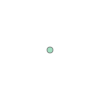

In [2]:
shapely.Point((18.071823,59.326708)) # first x (longitude) then y (latitude)

As you can see, our notebook returns the actual point.

In [3]:
type(shapely.Point((18.071823,59.326708)))

shapely.geometry.point.Point

Let's use it on our points in the list of tuples:

In [6]:
coordinates = [
    shapely.Point((18.071823, 59.326708)), # the castle
    shapely.Point((18.068204, 59.327682)), # the Riksdag
    shapely.Point((18.055831, 59.309703)) # the SÖS hospital
]

In [7]:
coordinates

[<POINT (18.072 59.327)>, <POINT (18.068 59.328)>, <POINT (18.056 59.31)>]

Now, our python data with pairs of floating points are converted into a list with geometries. This is a set of data that is accepted as geometries in a geodataframe. We create a geodataframe the same way we create a pandas dataframe, only that we also set the parameter `geometry`. But first we need to import the geopandas library. I'll import it as the alias `gpd` so I don't have to type "geopandas" everytime I want to access one of its methods or classes:

In [8]:
import geopandas as gpd

We can now use our `coordinates` list of points as the `geometry` argument and create a geodataframe:

In [9]:
gdf = gpd.GeoDataFrame(geometry=coordinates)
gdf

geometry
0  POINT (18.07182 59.32671)
1  POINT (18.06820 59.32768)
2  POINT (18.05583 59.30970)

As you can see, the output is the same as a normal pandas dataframe, only this time with a GeoSeries column named `geometry`. The power using geopandas is that we can add information to each geometry, but keep them in the same dataframe. Essentially, we have created a table consisting of vector geodata! Let's add some additional information. We'll add a column with the names of each location:

In [10]:
gdf['name'] = ['the Castle', 'the Riksdag', 'the SÖS hospital']

In [11]:
gdf

geometry              name
0  POINT (18.07182 59.32671)        the Castle
1  POINT (18.06820 59.32768)       the Riksdag
2  POINT (18.05583 59.30970)  the SÖS hospital

Just like pandas, geopandas has integrated visualisation tools (the `matplotlib` visualisation library) to visualize data. We can use the `.plot()` method to view our geodata:

<Axes: >

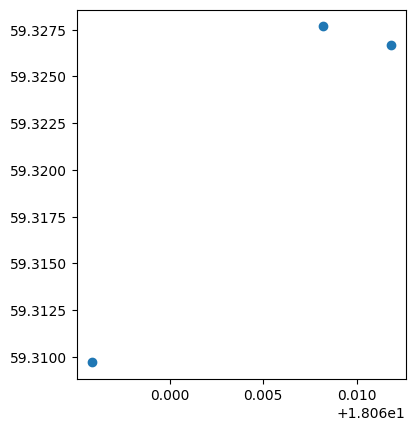

In [12]:
gdf.plot()

Per default, the visualisation will just plot the two point in relation to eachother. It gives us no other context, and is therefore rather unhelpful when just plotting a couple of points. Therefore, without any further data, it can be hard to evaluate if the points are in the right spot. 

There are libraries to use that downloads map data and plots the vectors in relation to an actual map. But to use such a map we need to be sure that the data has the right projection. Otherwise, the computer has no idea of where in the world the geodata is located.

To check the projection of our geodata in the geodataframe, we can use the `.crs` (short for "coordinate reference system") attribute:

In [13]:
gdf.crs

It returns nothing, since there is no projection set to the geodataframe. To do this, we can use pass the string `"epsg:4326"` to the `.crs` attribute to set the geodataframe's projection to WGS 84:

In [22]:
gdf.crs = "epsg:4326" # WGS 84

Running the attribute again, and it returns all registered information about the crs set to the data:

In [23]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can now use the `contextily` library to import map data to give our points a little context. To shorten the code, I'll import it to the acronym name `cx`:

In [15]:
import contextily as cx

Before moving on, I want to stress that in these following sections, I will use code that hasn't been discussed previously in the course. Please don't get hung up on code that you don't recognise. If you see something that you don't understand and that hasn't been explained earlier, don't fret. Focus on the parts that regards geodata. 

I won't go into the contextily libraries functionality more in detail in this course, only use it to visualize the data a bit more and give it context. I will just say that the parameter `zoom` tells contextily how detailed the map data should be. It goes from 1 (low detail) to 20 (maximum detail). Let's say we have two points where one is in America, and the other in Europe, the details of the map can be very low, since we need just basic details of a map that is very zoomed out (it won't have to load details of cities, roads, parks, borders etc etc). 

In our dataset, our three points are right next to eachother (the Riksdag and the castle is next door to eachother in Stockholm, seperated by a canal, and the SÖS hospital is just a couple kilometers away), so we can use a map with a high zoom value.

Another quick note: the following code also includes this line: `ax = gdf.plot(figsize=(10, 10))`. This saves the plot in the variable `ax` so that the contextily library can use the plot and display it in our notebook. Why this code is as it is will not be covered in this course, just know that it is used to display the data. You're not required to understand this code going forward:

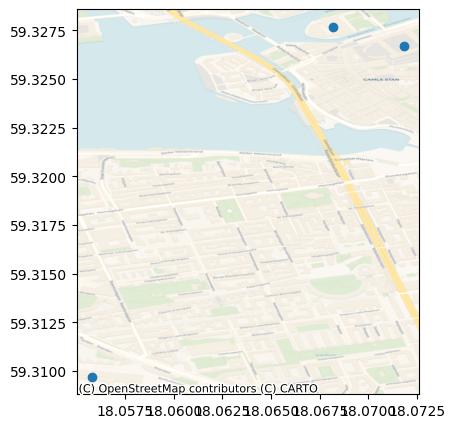

In [21]:
ax = gdf.plot(figsize=(5, 5))
cx.add_basemap(ax=ax, zoom=16, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

#### Line

The shapely library also has a class where you can convert coordinate data into a vector line – the `LineString` class. It works the same way as the `Point` class, just apply your list of vectordata as an argument to the class:

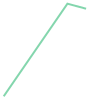

In [14]:
shapely.LineString(coordinates)

There is also the `LinearRing` class that connects the coordinates into an enclosed line:

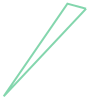

In [15]:
shapely.LinearRing(coordinates)

Note that this converts the entire list of vector points into a single vector line. So if we want to create a geodataframe of this, we need to create a new variable to pass to the geometry parameter:

In [16]:
line = shapely.LinearRing(coordinates)

Now, let's use this in a geodataframe:

In [17]:
gdf = gpd.GeoDataFrame(geometry=line)
gdf

ValueError: Unknown column LINEARRING (18.071823 59.326708, 18.068204 59.327682, 18.055831 59.309703, 18.071823 59.326708)

This doesn't work, since the geometry parameter requires a _collection_ of geometric data – it needs to be a list-like object. This is easily fixed, however. We'll just put the line object in a list!

In [19]:
gdf = gpd.GeoDataFrame(geometry=[line]) # <- notice the [] around the "line" variable?
gdf

geometry
0  LINEARRING (18.07182 59.32671, 18.06820 59.327...

To be able to plot it on a map, we need to set the crs:

In [20]:
gdf.crs = "epsg:4326" # WGS 84

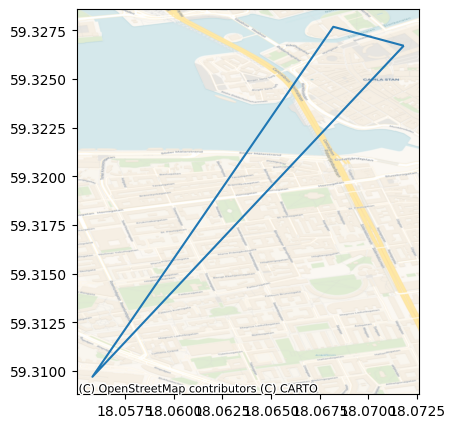

In [22]:
ax = gdf.plot(figsize=(5, 5))
cx.add_basemap(ax=ax, zoom=16, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

#### Polygon

Same goes with vector polygons. You can create your own by passing the list of vector data in the `coordinates` variable to the shapely class `Polygon`:

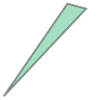

In [24]:
polygon = shapely.Polygon(coordinates)
polygon

And if we set crs, we can plot it on a map:

In [27]:
gdf = gpd.GeoDataFrame(geometry=[polygon]) # <- notice the [] around the "polygon" variable?

In [28]:
gdf.crs = "epsg:4326" # WGS 84

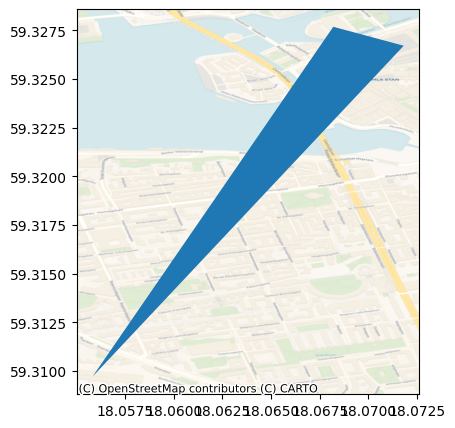

In [29]:
ax = gdf.plot(figsize=(5, 5))
cx.add_basemap(ax=ax, zoom=16, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

### Working with geodata from files

#### Importing data with the `gpd.read_file()` method

While working with geodata, you usually have a file with geodata to work with. Here, we will import a collection of polygons from a file. The file contains polygon vector data of the 290 municipalities of Sweden. The file lives in the folder geo within the course_material directory. Its relative path is: `../course_material/geo/`

In [24]:
path = "../course_material/geo/"

The file is a GeoJSON file called `municipalities.geojson`. Let's load it into our notebook using the geopandas library. Geopandas has a method called `.read_file()` that support the most common geospatial data formats – including geojson. We'll load the data using the method, and use the `.head()` method to show the first five rows of the dataframe:

In [25]:
gpd.read_file(path + 'municipalities.geojson').head()

id            name                                           geometry
0  0114  Upplands Väsby  MULTIPOLYGON (((665733.964 6599286.158, 664503...
1  0115      Vallentuna  MULTIPOLYGON (((682862.745 6601051.733, 682001...
2  0117       Österåker  MULTIPOLYGON (((680789.578 6592339.465, 680789...
3  0120          Värmdö  MULTIPOLYGON (((695849.978 6571340.949, 695506...
4  0123        Järfälla  MULTIPOLYGON (((658487.178 6587211.256, 657808...

Looks alright! Let's save it into a geodataframe variable:

In [26]:
gdf = gpd.read_file(path + 'municipalities.geojson')

Let's check what crs the data has:

In [27]:
gdf.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

It is in SWEREF99 TM, which makes sense, since it is Swedish data.

Let's just try and plot the entire dataset:

<Axes: >

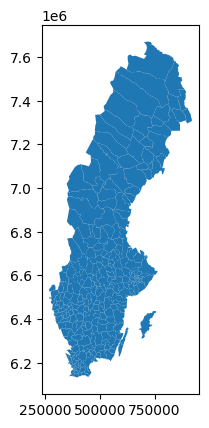

In [28]:
gdf.plot()

#### Plotting a selection of the `gpd.GeoDataFrame`

As I've touched upon in previous sections, what's great with geopandas is that we can use the power of pandas data manipulation and filtering, and use it on geospatial data. I'll give you a very simple example. Let's just filter all municipalities who's name starts with the letter "A". The names are found in the `KnNamn` column. The string method `.startswith()` returns a boolean and can therefore be used as a filtering method to our geodataframe.

Let me show you what I mean:

In [30]:
"This string starts with T.".startswith("A")

False

In [109]:
"A string that starts with A.".startswith("A")

True

So, in our dataset with municipalities, the line `.startswith("A")` will return `False` on `"Stockholm"`, but `True` on the municipality `"Ale"`. To use it in a dataframe, we can access string methods of our dataframe by typing `.str` on the column of our choice:

In [111]:
gdf['name'].str.startswith("A")

0      False
1      False
2      False
3      False
4      False
       ...  
285    False
286    False
287    False
288    False
289    False
Name: name, Length: 290, dtype: bool

We can use this as a filter:

In [112]:
gdf[gdf['name'].str.startswith("A")]

id        name                                           geometry
56   0604       Aneby  MULTIPOLYGON (((497667.647 6401233.875, 496647...
72   0764     Alvesta  MULTIPOLYGON (((477231.088 6304635.371, 473937...
145  1440         Ale  MULTIPOLYGON (((331717.843 6434392.741, 333702...
172  1489    Alingsås  MULTIPOLYGON (((346524.190 6431841.124, 344671...
197  1784      Arvika  MULTIPOLYGON (((372351.336 6654447.468, 374136...
207  1882   Askersund  MULTIPOLYGON (((496138.605 6506245.480, 495897...
220  1984      Arboga  MULTIPOLYGON (((541434.785 6565248.489, 540970...
234  2084      Avesta  MULTIPOLYGON (((578927.091 6666092.899, 576645...
276  2505  Arvidsjaur  MULTIPOLYGON (((649809.546 7287807.446, 649815...
277  2506    Arjeplog  MULTIPOLYGON (((657105.337 7289532.065, 657091...

Let's plot all municipalities who's name starts with the letter "A":

<Axes: >

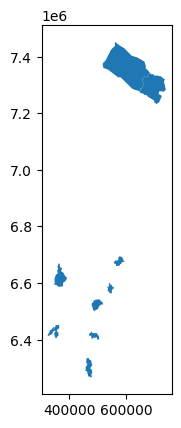

In [113]:
gdf[gdf['name'].str.startswith("A")].plot()

Let's include a map to make it a bit easier to put into context:

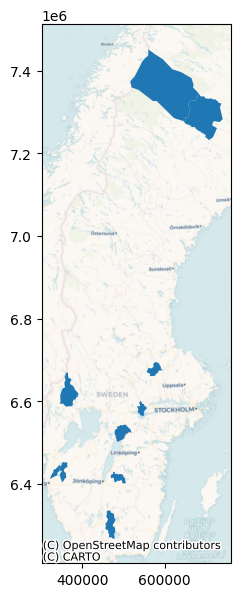

In [114]:
ax = gdf[gdf['name'].str.startswith("A")].plot(figsize=(7, 7))
cx.add_basemap(ax, zoom=6, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

#### Geospatial methods

##### The `area` attribute

Ok, so what if we would like to see on the map which municipalitites that are the 10 biggest municipalities in Sweden? This would require a value of area for each 290 polygons, which the dataset doesn't include. Fortunately, geopandas includes a number of geospatial methods that can be used to calculate out such a metric. And it is actually really easy. We only need to access the `geometry` column and ask for the area:

In [132]:
gdf['geometry'].area.head()

0    9.030053e+07
1    3.595469e+08
2    5.539137e+08
3    1.641808e+09
4    6.109096e+07
dtype: float64

These numbers are calculated based on the metadata that the projection of the dataset provides – in this case SWEREF99. SWEREF99's frame of referens is displayed in meters, so the values above is in square meters. 

_(Be advised, however, these calculations should be used with a grain of salt. The calculations of this area attribute has it flaws, and you should use the official numbers of area if you want to be sure. But they work just fine in our usecase, since we want to compare all the polygons, and however off they might be, they are calculated in the same way.)_

Let's save these numbers into an column called `area`, and let's convert that area into square kilometers instead to make it a bit more readable:

In [133]:
gdf['area'] = gdf['geometry'].area
gdf['area'] = gdf['area'] / 1_000_000 # one square kilometer is one million square meters

In [135]:
gdf['area'].head()

0      90.300535
1     359.546900
2     553.913724
3    1641.808109
4      61.090959
Name: area, dtype: float64

If we use the `.sort_values()` method on our dataframe, we can sort by the column area, and then plot the ten biggest municipalities. Note that I set the parameter `ascending` to `False` since we don't want the sort order to be ascending. We want the biggest municipality as the top row. Also, by passing the integer `10` as an argument to the `.head()` method, we return the top 10 rows:

In [137]:
gdf.sort_values('area', ascending=False).head(10)

id        name                                           geometry  \
289  2584      Kiruna  MULTIPOLYGON (((626252.141 7556081.410, 626314...   
278  2510    Jokkmokk  MULTIPOLYGON (((572531.931 7532521.275, 572531...   
283  2523   Gällivare  MULTIPOLYGON (((678274.222 7466178.376, 673496...   
277  2506    Arjeplog  MULTIPOLYGON (((657105.337 7289532.065, 657091...   
256  2313   Strömsund  MULTIPOLYGON (((516446.130 7032069.907, 507209...   
259  2361  Härjedalen  MULTIPOLYGON (((423979.257 6836593.978, 420997...   
271  2462  Vilhelmina  MULTIPOLYGON (((476930.785 7259557.275, 485960...   
257  2321         Åre  MULTIPOLYGON (((468740.411 6993009.730, 468303...   
267  2421    Storuman  MULTIPOLYGON (((532915.975 7255339.552, 514184...   
282  2521      Pajala  MULTIPOLYGON (((859875.245 7452760.544, 870202...   

             area  
289  20720.010042  
278  19682.329749  
283  16845.654513  
277  14472.118173  
256  11961.981854  
259  11715.883989  
271   8791.846722  
257   8377.172341  
267   8264.752957  
282   8156.930441

Let's plot the result:

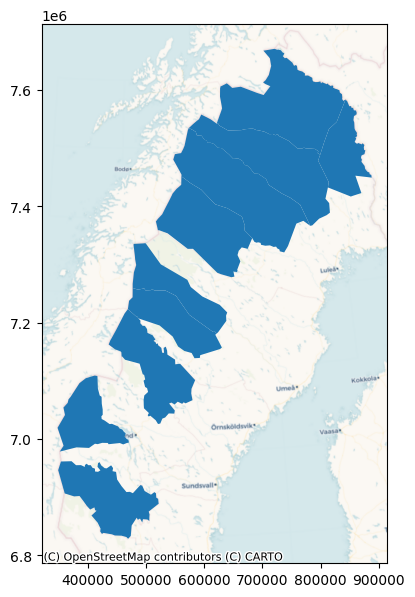

In [138]:
ax = gdf.sort_values('area', ascending=False).head(10).plot(figsize=(7, 7))
cx.add_basemap(ax, zoom=6, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

All the biggest municipalities are located up north west in Sweden.

##### The `centroid` attribute

What if we have a geodataframe with polygons, but we want to display them as single points instead? The `geometry` column has a attribute called `centroid` that provides the centerpoint of each polygon in the dataset. Let's plot them:

<Axes: >

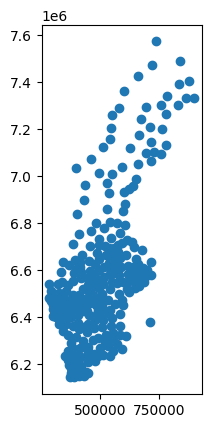

In [140]:
gdf['geometry'].centroid.plot()

#### The `dissolve` method

Sometimes you have a bunch of polygons, and you want to merge them into one large polygons. Let's say, as an example, that you want to compare the area of the Stockholm region to the area of the Skåne region (Sweden's most southern region). We can do this by merging polygons, using the `.dissolve()` method on polygons in the geodataframe.

First, we'll reload the data into a geodataframe:

In [31]:
gdf = gpd.read_file('../course_material/geo/municipalities.geojson')

The first two digits of the municipality `id` signifies the region where the municipality is located. Stockholms regional code is "01", and Skåne has "12". Let us start with Stockholm:

In [32]:
stockholm = gdf[gdf['id'].str.startswith('01')]
stockholm.head()

id            name                                           geometry
0  0114  Upplands Väsby  MULTIPOLYGON (((665733.964 6599286.158, 664503...
1  0115      Vallentuna  MULTIPOLYGON (((682862.745 6601051.733, 682001...
2  0117       Österåker  MULTIPOLYGON (((680789.578 6592339.465, 680789...
3  0120          Värmdö  MULTIPOLYGON (((695849.978 6571340.949, 695506...
4  0123        Järfälla  MULTIPOLYGON (((658487.178 6587211.256, 657808...

We can now use `.dissolve()` to melt all Stockhilm municipalities together into one:

In [33]:
stockholm = stockholm.dissolve()
stockholm

geometry    id            name
0  POLYGON ((657458.143 6520757.325, 656955.180 6...  0114  Upplands Väsby

As you can see, the resulting geodataframe has the id "0114" and the name "Upplands Väsby". This is because the `.dissolve()` returns all columns of the original geodatafram, and all values of the first row of the polygons merged. As you can see above while filtering, Upplands Väsby was the top row, and therefore these values was returned. 

Let's plot the results and see how it looks:

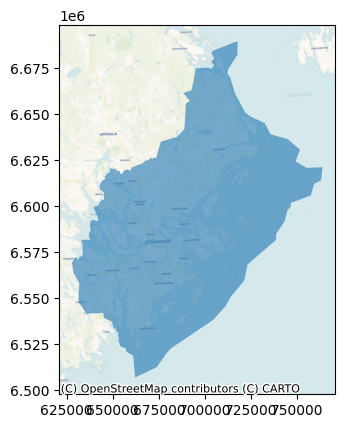

In [34]:
ax = stockholm.dissolve().plot(alpha=0.6) # the 'alpha' argument sets an opacity on the plot, making it see through
cx.add_basemap(ax, zoom=9, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

Now the same procedure with Skåne. Skånes region id is "12":

In [35]:
skane = gdf[gdf['id'].str.startswith('12')]
skane.head()

id          name                                           geometry
95  1214        Svalöv  MULTIPOLYGON (((386971.922 6196594.432, 385003...
96  1230  Staffanstorp  MULTIPOLYGON (((391601.873 6172705.471, 393981...
97  1231        Burlöv  MULTIPOLYGON (((379738.737 6164382.764, 378651...
98  1233      Vellinge  MULTIPOLYGON (((361754.020 6141755.669, 362106...
99  1256  Östra Göinge  MULTIPOLYGON (((445950.009 6247314.247, 448577...

In [36]:
skane = skane.dissolve()
skane

geometry    id    name
0  POLYGON ((385659.233 6136332.423, 384593.623 6...  1214  Svalöv

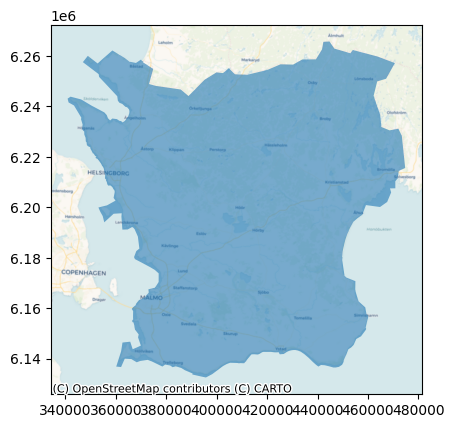

In [37]:
ax = skane.dissolve().plot(alpha=0.6)
cx.add_basemap(ax, zoom=9, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

Success! Let's check compare the area attribute between the two. Is Stockholm bigger than Skåne?

In [38]:
stockholm['geometry'].area > skane['geometry'].area

0    False
dtype: bool

No, it isn't. Let's print them out as square kilometers to see how big difference it is:

In [39]:
sthlm_area = stockholm['geometry'].area[0] # <- the "[0]" is because we want the first value in the series
skane_area = skane['geometry'].area[0]

In [40]:
sthlm_area = (sthlm_area / 1_000_000).round(1)
skane_area = (skane_area / 1_000_000).round(1)

In [41]:
print(f"The area of Stockholm is {sthlm_area} km2.")
print(f"The area of Skåne is {skane_area} km2.")

The area of Stockholm is 11470.1 km2.
The area of Skåne is 11764.8 km2.


Pretty close though!

#### Filtering the `gpd.GeoDataFrame`

Ok, let's make it even more interesting! In the directory `course_material`, there is a csv-file that includes population data for all 290 Swedish municipalities. What if we wanted to know where in Sweden the ten least populated municipalities are located? We can use this population data, together with our geodataframe.

We will start by importing the pandas library and then loading the population data into a pandas dataframe:

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("../course_material/swe_pop.csv", dtype=str) # the dtype argument is to import the data as string objects
df.head()

id            name   2022
0  0114  Upplands Väsby  49262
1  0115      Vallentuna  34851
2  0117       Österåker  49138
3  0120          Värmdö  46457
4  0123        Järfälla  85460

...and the geodata:

In [45]:
gdf = gpd.read_file('../course_material/geo/municipalities.geojson')

Let us double check that the population data has the same amount of rows as the geodataframe data, using the `.shape` attribute.

In [46]:
df.shape

(290, 3)

In [47]:
gdf.shape

(290, 3)

The first value in returned the tuple is the number of rows in the data, so we see that the two datasets both have 290 rows - one for each municipality in Sweden.

Using the `id` column, we can now merge this data with our geodataframe to add population data to the geodata. 

(Aside: Why the `id` column and not the `name` column? Different datasets may name datapoints differently. Using id's is always the safest approach.)

First, we can remove the `name` column in the population data. Since that is already included in the geodataframe, we won't need it in the endresults:

In [48]:
df = df.drop('name', axis=1) # the 'axis' argument specifies if we want to delete a row (0) or a column (1)

Let's merge:

In [49]:
gdf = gdf.merge(df, on='id', how='left') # merge "gdf" with "df" on the "id" column on the left dataframe (gdf in this case)
gdf.head()

id            name                                           geometry  \
0  0114  Upplands Väsby  MULTIPOLYGON (((665733.964 6599286.158, 664503...   
1  0115      Vallentuna  MULTIPOLYGON (((682862.745 6601051.733, 682001...   
2  0117       Österåker  MULTIPOLYGON (((680789.578 6592339.465, 680789...   
3  0120          Värmdö  MULTIPOLYGON (((695849.978 6571340.949, 695506...   
4  0123        Järfälla  MULTIPOLYGON (((658487.178 6587211.256, 657808...   

    2022  
0  49262  
1  34851  
2  49138  
3  46457  
4  85460

Ok, so if we want to get the least populated municipalities, we need to sort the geodataframe by the population data in column `"2022"`:

In [50]:
gdf.sort_values("2022").head(10)

id         name                                           geometry  \
212  1907   Surahammar  MULTIPOLYGON (((555679.334 6620560.553, 555330...   
45   0513        Kinda  MULTIPOLYGON (((556794.754 6443086.466, 559837...   
74   0767     Markaryd  MULTIPOLYGON (((401914.896 6275533.202, 406124...   
259  2361   Härjedalen  MULTIPOLYGON (((423979.257 6836593.978, 420997...   
17   0181   Södertälje  MULTIPOLYGON (((652963.779 6527492.135, 653278...   
222  2023       Malung  MULTIPOLYGON (((399762.074 6822785.113, 402211...   
195  1782    Filipstad  MULTIPOLYGON (((438509.355 6638737.236, 439537...   
241  2180        Gävle  MULTIPOLYGON (((616495.599 6771042.527, 615793...   
100  1257  Örkelljunga  MULTIPOLYGON (((388102.195 6229555.929, 383361...   
128  1315        Hylte  MULTIPOLYGON (((395137.879 6329404.968, 400592...   

       2022  
212   10033  
45    10068  
74    10166  
259   10185  
17   102426  
222   10258  
195   10315  
241  103493  
100   10455  
128   10464

Huh? That doesn't seem right. According to our sorting, the fifth least populated municipality has more inhabitants than the sixth. Let us check the data types in the dataset:

In [51]:
gdf.dtypes

id            object
name          object
geometry    geometry
2022          object
dtype: object

Ok, so the "2022" column is string objects. We need to convert them:

In [52]:
gdf["2022"] = gdf["2022"].astype('int')

In [53]:
gdf.sort_values("2022").head(6)

id      name                                           geometry  2022
262  2403  Bjurholm  MULTIPOLYGON (((687157.442 7079929.294, 684533...  2372
269  2425   Dorotea  MULTIPOLYGON (((530077.148 7156541.219, 530780...  2413
268  2422   Sorsele  MULTIPOLYGON (((596635.939 7244954.896, 576630...  2436
277  2506  Arjeplog  MULTIPOLYGON (((657105.337 7289532.065, 657091...  2667
272  2463     Åsele  MULTIPOLYGON (((653341.462 7140017.135, 683908...  2782
266  2418      Malå  MULTIPOLYGON (((648032.892 7239193.565, 653160...  3033

That looks correct! Let's plot the ten least populated municipalities:

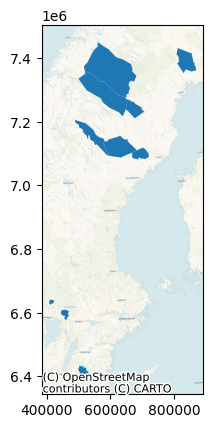

In [54]:
ax = gdf.sort_values("2022").head(10).plot()
cx.add_basemap(ax, zoom=7, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

What if we want to plot all municipalities with more than 100 000 inhabitants?

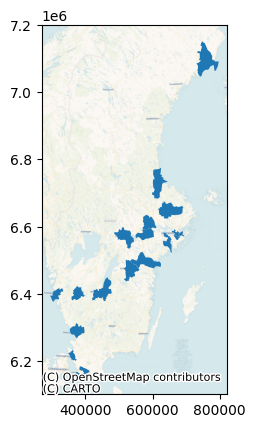

In [55]:
ax = gdf[gdf["2022"] > 100_000].plot()
cx.add_basemap(ax, zoom=7, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

Ok, but if we want to see all the municipalities, but color the polygons based on the number of inhabitants? We can use the parameter `cmap` in the `.plot()` method. You can see a list of [available color maps that you can use here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

<Axes: >

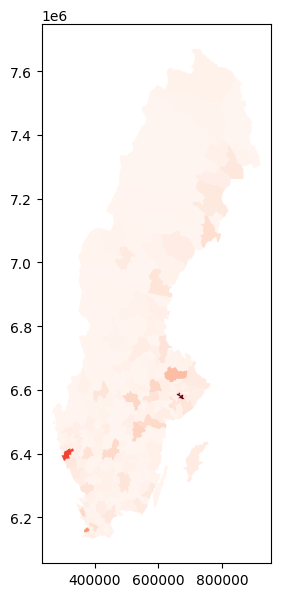

In [56]:
gdf.plot(column='2022',figsize=(7,7), cmap='Reds')

Ok, so this is pretty cool. But let's take it one step further. What if we want to make a plot, but plot a colormap of inhabitants per square kilometer? We can calculate this, using the `area` attribute:

First, calculate the area into km2, using the `geometry` column's `area` attribute:

In [57]:
gdf['km2'] = gdf['geometry'].area / 1_000_000 

In [58]:
gdf['km2'].head()

0      90.300535
1     359.546900
2     553.913724
3    1641.808109
4      61.090959
Name: km2, dtype: float64

Now, create a column with the number of inhabitants per square kilometer:

In [59]:
gdf['pop_p_km2'] = gdf["2022"] / gdf['km2']
gdf['pop_p_km2'].head()

0     545.533868
1      96.930331
2      88.710566
3      28.296242
4    1398.897670
Name: pop_p_km2, dtype: float64

Let's plot the results with a cmap:

<Axes: >

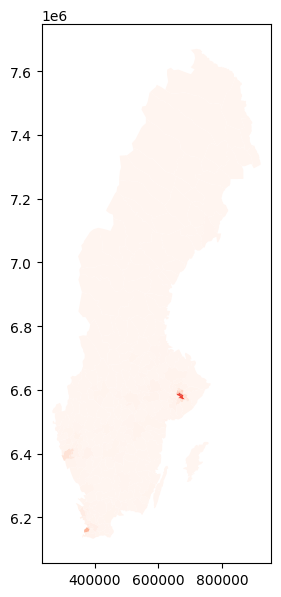

In [60]:
gdf.plot(column='pop_p_km2',figsize=(7,7), cmap='Reds')

Ok, so we're on to something, but the problem here is that there are some municipalities that has so much more inhabitants per km2 compared to the rest of the country that all the rest is visually obscured. Let's see which municipalities that are on top:

In [61]:
gdf.sort_values('pop_p_km2', ascending=False).head(10)

id        name                                           geometry  \
19   0183  Sundbyberg  MULTIPOLYGON (((668194.557 6584770.479, 666568...   
20   0184       Solna  MULTIPOLYGON (((670513.393 6581834.354, 670511...   
16   0180   Stockholm  MULTIPOLYGON (((664212.026 6573677.494, 664210...   
116  1280       Malmö  MULTIPOLYGON (((369451.861 6152711.919, 369373...   
4    0123    Järfälla  MULTIPOLYGON (((658487.178 6587211.256, 657808...   
15   0163  Sollentuna  MULTIPOLYGON (((665733.964 6599286.158, 666358...   
13   0160        Täby  MULTIPOLYGON (((677985.991 6594062.464, 678021...   
97   1231      Burlöv  MULTIPOLYGON (((379738.737 6164382.764, 378651...   
14   0162    Danderyd  MULTIPOLYGON (((675896.140 6585308.656, 675896...   
21   0186     Lidingö  MULTIPOLYGON (((679594.615 6581714.568, 679495...   

       2022         km2    pop_p_km2  
19    54070    7.137625  7575.348621  
20    85450   17.502953  4882.033344  
16   984748  213.844190  4604.978990  
116  357377  177.191683  2016.894887  
4     85460   61.090959  1398.897670  
15    76237   64.877100  1175.098771  
13    75137   67.738745  1109.217485  
97    19882   18.842562  1055.164353  
14    32692   31.949195  1023.249566  
21    48432   51.234291   945.304377

Ok, Sundbyberg, the smallest municipality in Sweden has 7575 swedes per square kilometer. Let's compare that to the mean:

In [62]:
gdf['pop_p_km2'].mean()

145.5936275177991

Let's try the same plot again, but excluding all municipalities with more than the average value of 145 inhabitants per square kilometer:

In [63]:
gdf[gdf['pop_p_km2'] < 145].shape

(260, 6)

Ok, so 260 municipalities of 290 has fewer than 500 inhabitants per km2. Let's just plot them:

<Axes: >

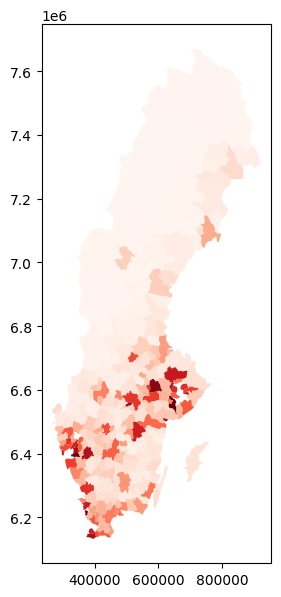

In [64]:
gdf[gdf['pop_p_km2'] < 145].plot(column='pop_p_km2',figsize=(7,7), cmap='Reds')

### Exercise – plotting a geodata heatmap of where the most senior citizens lives

In the `course_material` directory. There is a csv file that includes age group population data for all municipalities in Sweden:

In [269]:
df = pd.read_csv("../course_material/swe_pop2022_age_groups.csv", dtype='str')

In [272]:
df.shape

(6090, 4)

In this exercise, I want you to transform this data, using the pandas method `.groupby()` (see chapter 6 if you need a refresher), so that it summarizes the number of inhabitants 65 years or older per municipality. A hint is that the correct number for Stockholm is 155 204 inhabitants that are 65 years or older.

Take this number and divide it by the total number of inhabitants per municipality, and you get the percentage of senior citizens per municipality. Merge this percentage with the geodataframe:

In [287]:
gdf = gpd.read_file('../course_material/geo/municipalities.geojson')

...and plot a heatmap of all municipalities' percentage of senior citizens.

Remember, as always, there isn't necessary _one_ way to do this. My solution can be found in the solutions notebook!

Good luck!

## Case study – shootings in Sweden

So by now, you've hopefully grasped the power (and fun!) of working with geodata. But let's take it a step further. In this chapter, we will use police data with coordinates of all shootings in Sweden the years 2018–2022. The data includes date of the shooting, if someone was injured or died, and finally coordinates of where the shooting took place. 

We will start by learning how to filter a dataset based on geospatial data. You will learn how to filter all shootings in Stockholm, simply by using the shootings coordinates. But first, we need to import the `geopandas` library. I will also import the `pandas` and `contextily` libraries for additional features:

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx

Now, we need to load the data. It's named `shootings.geojson` and lives in the `course_material/geo` directory:

In [65]:
gdf = gpd.read_file('../course_material/geo/shootings_data.geojson')

Let's see what crs the data has:

In [66]:
gdf.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Ok, so the projection is SWEREF99 TM, which makes sense.

Let's have a look at the data:

In [67]:
gdf.shape

(1525, 4)

So all in all, there are 1525 shootings in the dataset

In [68]:
gdf['date'].min()

'2018-01-03'

In [69]:
gdf['date'].max()

'2022-12-31'

The first shooting occured the third of January 2018, and the last one the 31st of December 2022.

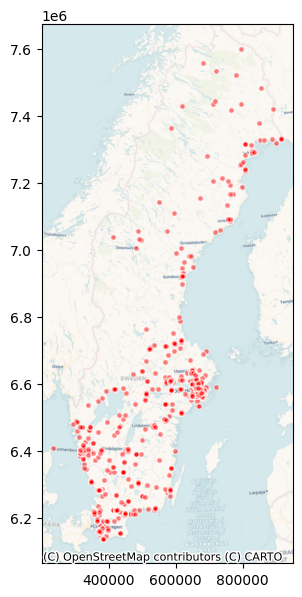

In [70]:
ax = gdf.plot(figsize=(7, 7), alpha=0.5, edgecolor="white", markersize = 15, color='r')
cx.add_basemap(ax, zoom=6, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

According to the map we can see that gun violence is present all over the country (it has been a main news story for years now).

### Finding points within polygons

Ok, so how do we use pandas if we want to see only the shootings in Stockholm? Using geospatial data, we can use geopandas algorithms to filter coordinates that are spatially situated within certain polygons. Let's start by loading geodata of all municipalities in Sweden:

In [10]:
munis = gpd.read_file('../course_material/geo/municipalities.geojson')

In [13]:
munis.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

It has the same projection as the shootings data, that means that we can compare the two.

If we plot both datasets on the same canvas, we can see that all shooting coordinates are within municipal polygons:

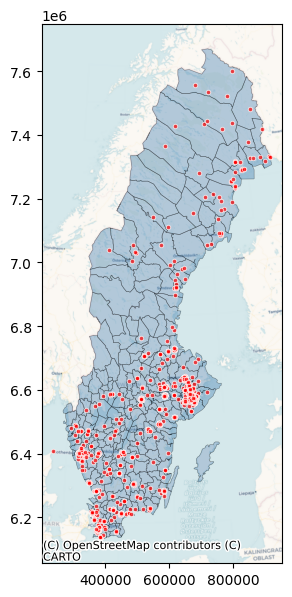

In [24]:
ax = munis.plot(figsize=(7, 7), alpha=0.4, edgecolor="black", linewidth=0.4, color='steelblue') # plot the muncipalities
gdf.plot(ax=ax, alpha=0.7, edgecolor="white", linewidth=0.7, markersize = 10, color='r') # plot the shootings on the same canvas (ax=ax)
cx.add_basemap(ax=ax, zoom=6, crs=munis.crs.to_string(), source=cx.providers.CartoDB.Voyager) # add map context to the same canvas

Ok, so how do we select all shootings – and _only_ those shootings – that occured in the Stockholm area? The geopandas library has a very powerful method called `.sjoin()` which stands for "spatial join". The method has a parameter called `predicate` where you can specify what type of spatial algorithm you wish employ. In this case, we want to see which point is within what polygon. So we want to use the string `"within"` as an argument to the parameter `predicate`:

In [27]:
gpd.sjoin(gdf,munis,predicate='within').drop('index_right',axis=1).sort_values('date').head()

date  injured  dead                        geometry    id       name
0  2018-01-03        1     0  POINT (681500.000 6563500.000)  0136    Haninge
2  2018-01-04        0     0  POINT (678300.000 6575000.000)  0180  Stockholm
1  2018-01-04        1     0  POINT (616200.000 6515400.000)  0480   Nyköping
4  2018-01-05        0     0  POINT (663800.000 6571700.000)  0126   Huddinge
3  2018-01-05        0     0  POINT (805700.000 7317200.000)  2582      Boden

As you can see, using the spatial join method, geopandas looked at each point to see in which polygon it is located. It then merged that polygon data to the shooting dataset, adding columns with each municipality's id and name. Let's save this result into a geodataframe:

In [28]:
gdf = gpd.sjoin(gdf,munis,predicate='within').drop('index_right',axis=1).sort_values('date')

Using a simple booelean selector as a filter, we can now filter all values of a specific municipality:

In [30]:
gdf[gdf['name']=='Stockholm'].head()

date  injured  dead                        geometry    id       name
2   2018-01-04        0     0  POINT (678300.000 6575000.000)  0180  Stockholm
7   2018-01-08        0     1  POINT (666400.000 6587100.000)  0180  Stockholm
19  2018-01-19        1     0  POINT (675500.000 6581400.000)  0180  Stockholm
26  2018-02-08        0     0  POINT (670900.000 6576000.000)  0180  Stockholm
27  2018-02-09        0     0  POINT (666200.000 6587100.000)  0180  Stockholm

Here's a plot of the results together with a map for context:

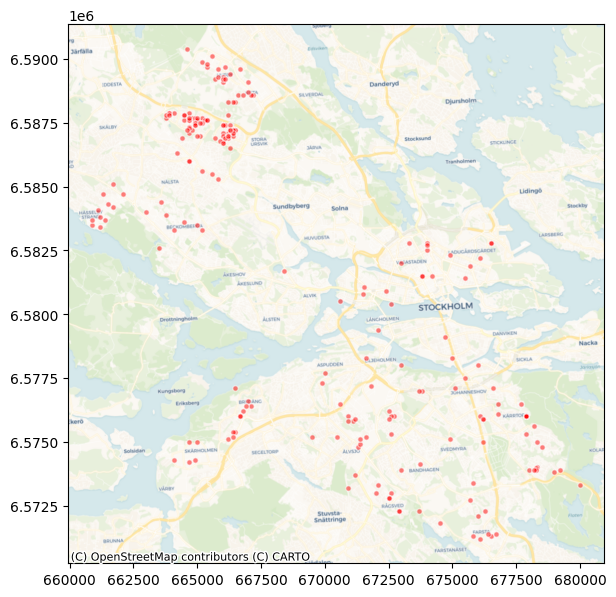

In [31]:
tmp = gdf[gdf['name']=='Stockholm']
ax = tmp.plot(figsize=(7, 7), alpha=0.5, edgecolor="white", markersize = 15, color='r')
cx.add_basemap(ax, zoom=12, crs=tmp.crs.to_string(), source=cx.providers.CartoDB.Voyager)

But let's say we want to only plot shootings where people were injured or died. Let's try again but plotting shooting deaths as black, and injured as red:

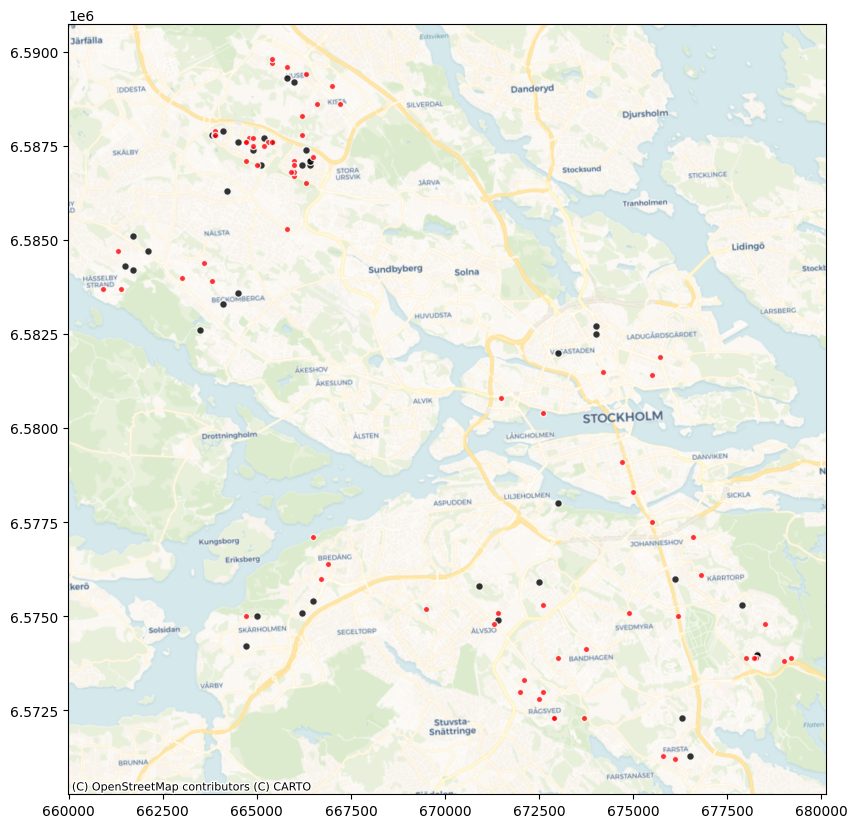

In [35]:
dead = gdf[(gdf['name']=='Stockholm')&(gdf['dead']>0)]
inj = gdf[(gdf['name']=='Stockholm')&(gdf['injured']>0)]
ax = dead.plot(figsize=(10, 10), alpha=0.8, edgecolor="white", markersize = 30, color='black')
inj.plot(ax=ax, alpha=0.8, edgecolor="white", markersize = 20, color='red')
cx.add_basemap(ax, zoom=12, crs=tmp.crs.to_string(), source=cx.providers.CartoDB.Voyager)

Gun violence is present all over Stockholm, but especially to the north west – an area infamous for social issues, big communities with immigrant background and problems related to social exclusion and organised crime.

### Connecting points with points

Ok, so hopefully, you've seen the power of using geodata. Using the techniques above, you can merge geodata with non-geodata, and build your own datasets. 

But let's go even further! 

In this section, we're going to try something pretty wild. So, we have the shootings data. What if we would like to see how common it is that people shoot close to something sensitive. Let us try to answer the question: how common is it that shootings occur next to kindergradens? This is surprisingly straight forward while using geopandas.

In the `course_material` there's a file with kindergarden data, with coordinates for all preschools (kindergardens) in Sweden. Let's first do our imports, and then load the data:

In [82]:
import pandas as pd
import geopandas as gpd
import contextily as cx


In [83]:
preschools = gpd.read_file('../course_material/geo/swe_preschools.geojson')

In [84]:
preschools.shape

(9497, 11)

So close to 9500 kindergardens in Sweden. Let's inspect the data:

In [85]:
preschools.head()

fid        Besöksadress     Besöksort                       Firmabenämning  \
0    1       BENNETS VÄG 3         MALMÖ                   FÖRSKOLA VILDROSEN   
1    2      BRODDAGATAN 57         MALMÖ                      FÖRSKOLA BRODDA   
2    3        GÅSATOFTEN 1          LUND                        MÅRTENSSKOLAN   
3    4  FRITIDSGATAN 10-12  SÖDRA SANDBY  FÖRSKOLA HALLONBACKEN OCH SOLBACKEN   
4    5     FRITIDSGATAN 14  SÖDRA SANDBY                 FÖRSKOLA BJÖRKBACKEN   

   Företagsnamn Kommun Kommunnamn      Postadress Postadressort Postnummer  \
0  MALMÖ KOMMUN   1280      Malmö                         MALMÖ      20580   
1  MALMÖ KOMMUN   1280      Malmö                         MALMÖ      20580   
2  LUNDS KOMMUN   1281       Lund    GÅSATOFTEN 1          LUND      22467   
3  LUNDS KOMMUN   1281       Lund  FRITIDSGATAN 2  SÖDRA SANDBY      24734   
4  LUNDS KOMMUN   1281       Lund  FRITIDSGATAN 2  SÖDRA SANDBY      24734   

                         geometry  
0  POINT (375923.000 6161949.000)  
1  POINT (371084.000 6160141.000)  
2  POINT (389109.000 6174894.000)  
3  POINT (395758.000 6176044.000)  
4  POINT (395805.000 6176067.000)

We'll start by removing unnecessary columns. We want the preeschool id (`"fid"`), the name (in the column `"Firmabenämning"`), the municipality id and name (`"Kommun"` for id, and `"Kommunnamn"` for name) and the geometry:

In [86]:
preschools = preschools[["fid","Firmabenämning","Kommun","Kommunnamn","geometry"]]
# renaming columns as well to English
preschools.columns = ['preeschool_id','preschool_name','municipality_id','municipality_name','geometry']

<Axes: >

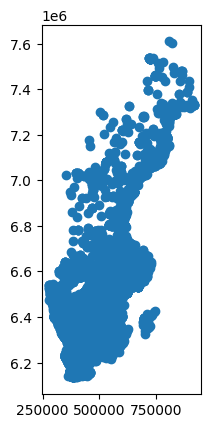

In [87]:
preschools.plot()

Now load shooting data:

In [88]:
shootings = gpd.read_file('../course_material/geo/shootings_data.geojson')

In [89]:
shootings.head()

date  injured  dead                        geometry
0  2018-01-03        1     0  POINT (681500.000 6563500.000)
1  2018-01-04        1     0  POINT (616200.000 6515400.000)
2  2018-01-04        0     0  POINT (678300.000 6575000.000)
3  2018-01-05        0     0  POINT (805700.000 7317200.000)
4  2018-01-05        0     0  POINT (663800.000 6571700.000)

Ok, let's plot Stockholm's preeschools together with shootings in Stockholm. But then I need to add in which municipality each shooting occured in:

In [90]:
munis = gpd.read_file('../course_material/geo/municipalities.geojson')

In [91]:
munis.columns

Index(['id', 'name', 'geometry'], dtype='object')

Let's change the names of the columns in this file as well, for clarity's sake:

In [92]:
munis.columns = ["municipality_id", "municipality_name", "geometry"]

Now, we'll check to see within which polygon each point is located, using the `.sjoin()` method:

In [93]:
shootings = gpd.sjoin(shootings, munis, predicate='within').drop('index_right',axis=1)

In [94]:
shootings.head()

date  injured  dead                        geometry  \
0    2018-01-03        1     0  POINT (681500.000 6563500.000)   
73   2018-04-25        1     0  POINT (678400.000 6557700.000)   
143  2018-07-04        0     0  POINT (674100.000 6554100.000)   
264  2018-11-06        1     0  POINT (679600.000 6563000.000)   
436  2019-06-02        0     0  POINT (677800.000 6557900.000)   

    municipality_id municipality_name  
0              0136           Haninge  
73             0136           Haninge  
143            0136           Haninge  
264            0136           Haninge  
436            0136           Haninge

We can now plot data within Stockholm municipality:

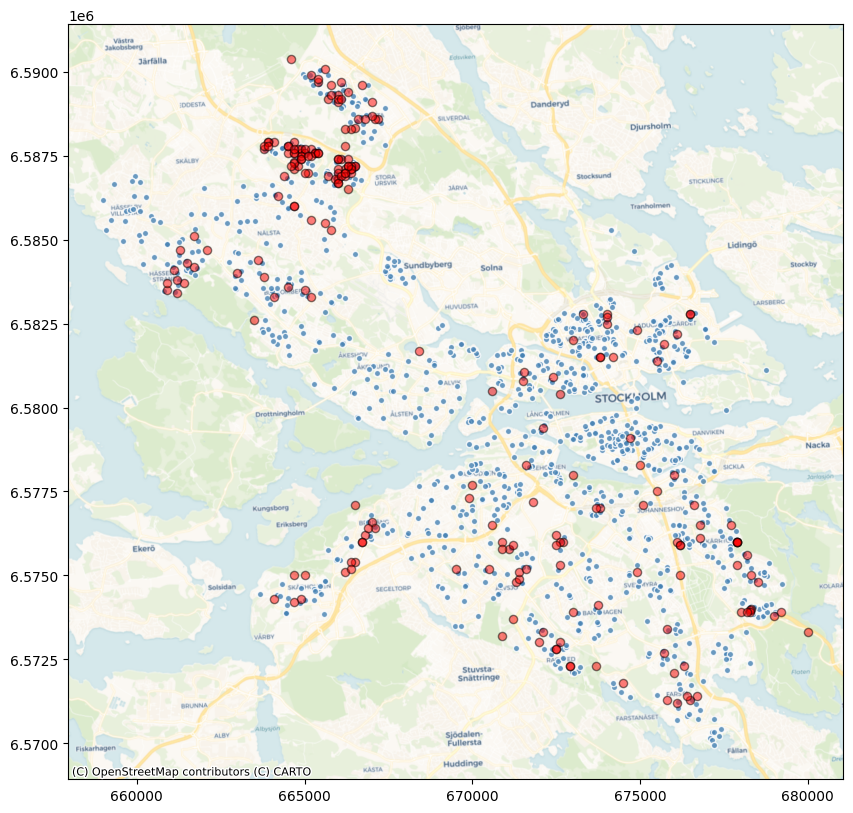

In [95]:
muni_id = '0180'

sthlm_shootings = shootings[shootings['municipality_id']==muni_id]
sthlm_preeschools = preschools[preschools['municipality_id']==muni_id]

ax = sthlm_preeschools.plot(figsize=(10, 10), alpha=0.8, edgecolor="white", markersize = 20, color='steelblue')
sthlm_shootings.plot(ax=ax, alpha=0.5, edgecolor="black", markersize = 35, color='red')
cx.add_basemap(ax, zoom=12, crs=sthlm_shootings.crs.to_string(), source=cx.providers.CartoDB.Voyager)

Just looking at this plot, we can see that a lot of shootings (red dots) occur dangerously close to kindergardens (blue dots). Ok, so how do we check to see which kindergarden is the closest for each shooting? There are a couple of ways to do this. The most straight forward is just using a spatial method called `.sjoin_nearest()`. 

We start with the geodataframe that we want to join to. In this case we want to start with the shootings, since we want to see how close each _shooting_ was to a kindergarden. The first argument is the geodataframe that we want to compare with, in this case the `preschools` dataframe. We also want to save a column with the distance to the nearest point, and the method has a parameter for just that! Setting the parameter `distance_col` creates a column with the distance to the merged point. Here's the code:

In [96]:
merged = shootings.sjoin_nearest(preschools, how='left', distance_col='dist')

We can now sort the geodataframe using the `.sort_values()` on the column "dist" to find the shooting that occured closest to a kindergarden:

In [97]:
merged.sort_values('dist').head(1)

date  injured  dead                        geometry  \
1358  2022-07-04        1     0  POINT (585000.000 6610300.000)   

     municipality_id_left municipality_name_left  index_right  preeschool_id  \
1358                 1980               Västerås         5758           5759   

     preschool_name municipality_id_right municipality_name_right  dist  
1358                                 1980                Västerås   5.0

The shooting with the shortest distance to a preeschool was in the municipality Västerås and occured within just 5 meters from a preschool (no name registered, only the id `5759`). Let's plot it:

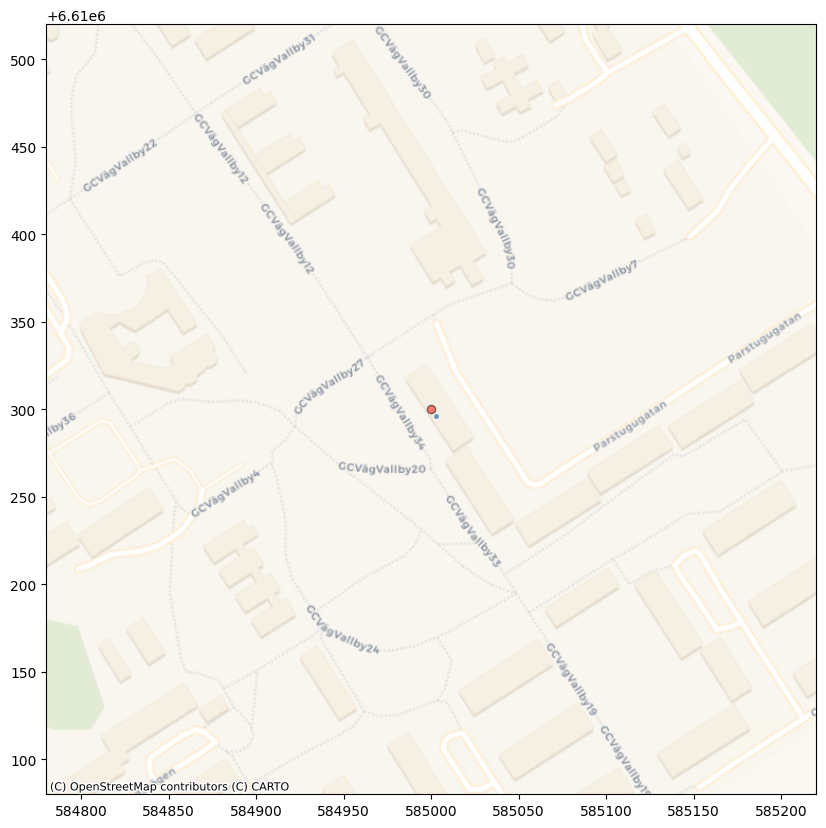

In [98]:
tmp_shootings = shootings[(shootings.index==1358)] # filteres the shooting with index 1358
tmp_preeschools = preschools[preschools['preeschool_id']==5759] # filtering the preschool with id 5759
circle_polygon = tmp_shootings['geometry'].buffer(200) # this creates a polygon around the shooting, and is just used to produce a more palettable plot

ax = circle_polygon.plot(figsize=(10, 10), alpha=0)
tmp_preeschools.plot(ax=ax, alpha=0.8, edgecolor="white", markersize = 20, color='steelblue')
tmp_shootings.plot(ax=ax, alpha=0.5, edgecolor="black", markersize = 35, color='red')

cx.add_basemap(ax, zoom=17, crs=tmp_shootings.crs.to_string(), source=cx.providers.CartoDB.Voyager)

As you can see, this occured in the same building as a kindergarden, in the city of Västerås. 

Going further, let's see the average distance between a shooting a kindergarden:

In [99]:
merged['dist'].mean()

715.9960199978648

Ok, in average, shootings occur 716 meters from preeschools. How many shootings have occured within 100 meters from a preeschool?

In [100]:
merged[merged['dist']<100].shape

(276, 12)

276 shootings. How many of those are when someone where shot to death?

In [101]:
merged[(merged['dist']<100)&(merged['dead']>0)].shape

(45, 12)

In [102]:
merged[(merged['dist']<100)&(merged['dead']>0)]['dead'].sum()

47

Since 2018, 47 murders happend within 100 meters of a kindergarden in Sweden.

### Exercise – does shootings creep closer to kindergardens?

In this exercise, I want you to use the data and techniques learned in the course so far to see if Swedish shootings are, on average, occuring closer to kindergardens today compared to earlier years in the dataset. Use the same data as in previous section:

In [153]:
shootings = gpd.read_file('../course_material/geo/shootings_data.geojson')

Also, can you see a difference if you group shootings were someone was killed? 

As always, my solution is found in the solutions notebook. Good luck!